# Assigment Python 1
#### Data Set : London Crime Data
#### Sumber Data set : https://www.kaggle.com/datasets/jboysen/london-crime

### Penjelasan Data Set  

Kejahatan di wilayah metropolitan besar, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori besar/kecil dari Jan 2008-Des 2016.

Column yang ada pada data set<br>

lsoa_code: kode untuk Area Output Super Bawah di London Raya.<br>
borough: Nama umum untuk wilayah London.<br>
major_category: Kategorisasi kejahatan tingkat tinggi.<br>
minor_category: Kategorisasi kejahatan tingkat rendah.<br>
value: jumlah kejahatan kategorikal yang dilaporkan setiap bulan di wilayah tertentu<br>
year: Tahun penghitungan yang dilaporkan, 2008-2016<br>
month: Bulan penghitungan yang dilaporkan, 1-12<br>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium


### Membaca dataset

In [48]:
df = pd.read_csv('D:\Kuliah\Semester 7\Hacktiv8\Dataset\london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Data Preprocessing & Data Cleanning

Menampilkan jumlah baris dan kolom

In [49]:
df.shape

(13490604, 7)

Menampilkan ada kolom apa saja pada dataset

In [50]:
df.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

Mengecek missing value

In [51]:
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

Mengecek statistik deskriptif data dalam Dataset

In [52]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Mengecek missing value

In [53]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Mengecek data duplikat atau double

In [54]:
df.duplicated().sum()

0

Mengecek tipe data setiap kolom

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Mengecek ada value apa saja dan ada berapa 

In [56]:
df['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

Menampilkan total kejahatan terbesar di setiap tahun dalam bentuk tabel

In [57]:
crime = df.pivot_table(index='year', columns='major_category', values='value', aggfunc=np.sum, fill_value=0)
crime

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Melakukan transpose pada variabel crime untuk merubah baris menjadi kolom

In [58]:
major_crime = crime.transpose()
major_crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


Menambahkan colom Total Crime yang menjumlahkan total major category pada setiap tahun

In [59]:
crime['Total Crime'] = crime.sum(axis=1, numeric_only=True)
crime

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total Crime
year,,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844,738641
2009,90619,85565,60549,0,10644,29568,0,279492,160777,717214
2010,86826,77897,58674,0,10768,32341,0,290924,157894,715324
2011,93315,70914,57550,0,10264,36679,0,309292,146901,724915
2012,93392,62158,51776,0,10675,35260,0,334054,150014,737329
2013,87222,56206,50278,0,10811,29337,0,306372,146181,686407
2014,76053,59279,44435,0,13037,22150,0,279880,185349,680183
2015,70489,62976,39785,0,14229,21383,0,284022,218740,711624
2016,68285,64071,38914,0,15809,22528,0,294133,232381,736121


Menambahkan kolom total yang menjumlahkan total kasus pada setiap kategori dari tahun 2008 sampai 2016

In [60]:
major_crime['Total'] = major_crime.sum(axis=1, numeric_only=True)
major_crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


Nama kolom yang kebanyakannya bilangan bulat seperti tahun yang akan menimbulkan ketika kita akan mengambil pada tahun 2016 orang munugkin akan bingung ketika akan memanggil dan tidak mengetahui indeks posisi 2016.

Untuk mengatasi kebingungan tersebut di ubah menjadi string '2008' sampai '2016'

In [61]:
major_crime.columns

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 'Total'], dtype='object', name='year')

Merubah nama kolom menjadi string

In [62]:
major_crime.columns = list(map(str, major_crime.columns))

Dengan diubahnya atau dikonversinya tahun menjadi string, maka di deklarasikan variabel years

In [63]:
years = list(map(str, range(2008, 2017)))
years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [64]:
major_crime.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Total'],
      dtype='object')

Menampilkan total kasus yang terjadi di wilayah yang ada di london setiap tahun

In [65]:
borough = df.pivot_table(index='year', columns='borough', values='value', aggfunc=np.sum, fill_value=0)
borough

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


Melakukan transpose pada variabel borough untuk merubah baris menjadi kolom

In [66]:
crime_borough = borough.transpose()
crime_borough.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


Menambahkan colom Total Crime yang menjumlahkan total kasus kejahatan pada setiap wilayah

In [67]:
crime_borough['Total Crime in Borough'] = crime_borough.sum(axis=1, numeric_only=True)
crime_borough.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Crime in Borough
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


Merubah nama kolom menjadi string

In [68]:
crime_borough.columns

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       'Total Crime in Borough'],
      dtype='object', name='year')

In [69]:
crime_borough.columns = list(map(str, crime_borough.columns))

Dengan diubahnya atau dikonversinya tahun menjadi string, maka di deklarasikan variabel tahun

In [70]:
tahun = list(map(str, range(2008, 2017)))
tahun

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [71]:
crime_borough.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Total Crime in Borough'],
      dtype='object')

## Visualisasi Data

### Perubahan jumlah kejahatan dari tahun 2008 - 2016

Membuat variabel total_crime yang berisi daftar tahun dan total kejahatan

In [72]:
total_crime = crime['Total Crime']
total_crime

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: Total Crime, dtype: int64

Membuat visualisasi dari total_crime menggunakan grafik garis dengan 'x' di pada setiap tahun

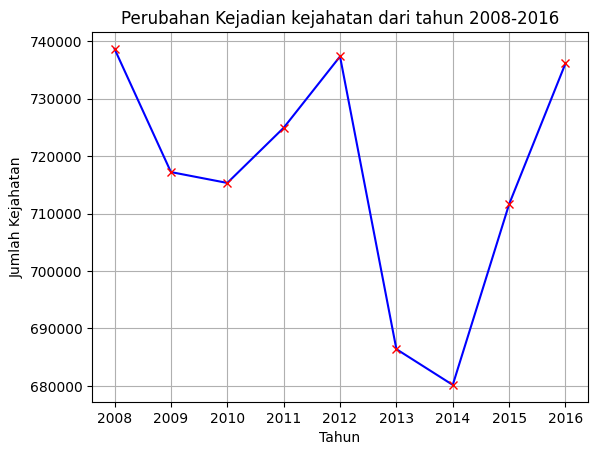

In [73]:
plt.plot(total_crime, "b-", total_crime, "rx")
plt.grid(True)

plt.title('Perubahan Kejadian kejahatan dari tahun 2008-2016')
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')

plt.show()

Dari grafik diatas dapat di simpulkan bahwa total major kategori yaitu pada tahun 2008, dengan total 738.641 kasus , sedangkan major category paling rendah yaitu ada pada tahun 2014, dengan total 680.183 kasus.

Fungsi dari grafik ini 

1.Grafik ini memberikan representasi visual tentang bagaimana jumlah kasus kejahatan berubah dari tahun ke tahun dalam berbagai kategori utama. Ini membantu untuk dengan cepat melihat tren dan perubahan.

2.Membandingkan Tahun: Anda dapat dengan mudah membandingkan jumlah kasus kejahatan di berbagai tahun. Ini membantu dalam mengidentifikasi tahun-tahun tertentu yang mungkin memerlukan perhatian lebih karena peningkatan atau penurunan yang signifikan dalam kejahatan.

## Area Plot
### Visualisasi 5 major category tertinggi dari tahun 2008 - 2016

Membuat variabel baru yaitu 'top5_crime' yang berisi data 5 major category tertinggi selama tahun 2008 - 2016

In [74]:
major_crime.sort_values(by='Total', ascending=False, axis=0, inplace=True)

top5_crime = major_crime.head()

top5_crime = top5_crime[years].transpose()

top5_crime

major_category,Theft and Handling,Violence Against the Person,Burglary,Criminal Damage,Drugs
2008,283692,159844,88092,91872,68804
2009,279492,160777,90619,85565,60549
2010,290924,157894,86826,77897,58674
2011,309292,146901,93315,70914,57550
2012,334054,150014,93392,62158,51776
2013,306372,146181,87222,56206,50278
2014,279880,185349,76053,59279,44435
2015,284022,218740,70489,62976,39785
2016,294133,232381,68285,64071,38914


Merubah index pada top5_crime menjadi integer

In [75]:
top5_crime.index = top5_crime.index.map(int)

Membuat visualisasi dari variable top5_crime dengan area plot tanpa stacked dan transparansi sebesar 0,75

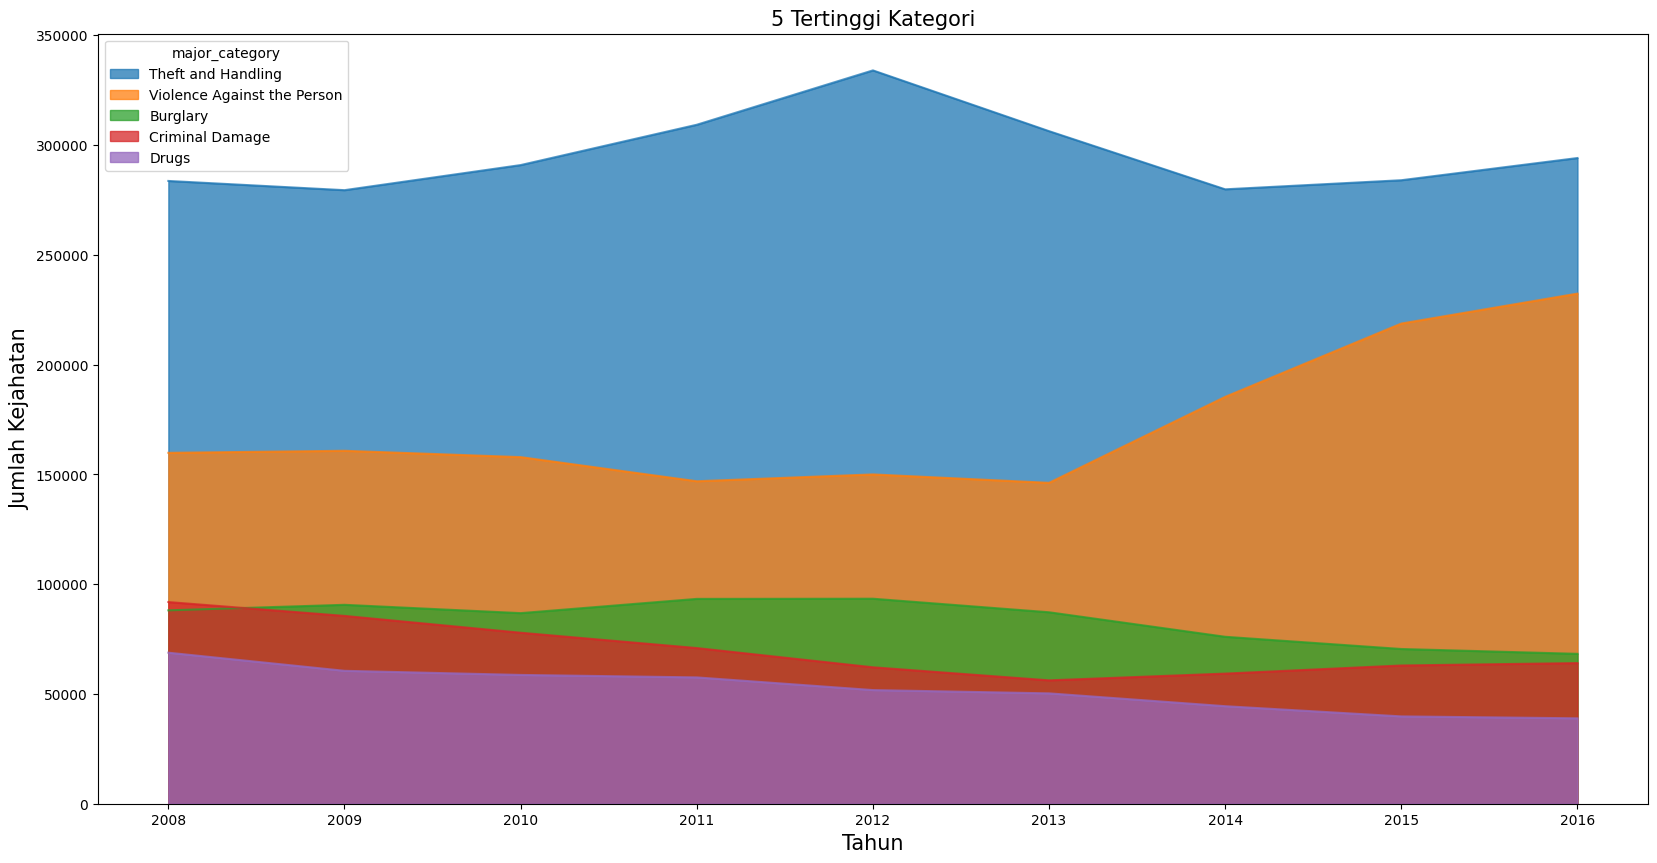

In [76]:
top5_crime.plot(kind='area',
                alpha=0.75,
                stacked=False,
                figsize=(20,10), # pass a tuple (x,y) size
                )

plt.title('5 Tertinggi Kategori', fontsize=15)
plt.ylabel('Jumlah Kejahatan', fontsize=15)
plt.xlabel('Tahun', fontsize=15)

plt.show()

Dari visualsisasi diatas dapat di simpulkan bahwa 5 kategori utama tertinggi yaitu Theft and Handling, Violence Against the Person, Burglary, Criminal Damage dan drugs.

### Visualisasi 5 wilayah dengan kasus kriminal terendah dari tahun 2008 - 2016 

Membuat variabel baru yaitu 'crime_borough' yang berisi data 5 wilayah dengan kasus kejahatan terendah selama tahun 2008 - 2016

In [77]:
crime_borough.sort_values(by='Total Crime in Borough', ascending=False, axis=0, inplace=True)

lowest5_borough = crime_borough.tail()

lowest5_borough = lowest5_borough[years].transpose()

lowest5_borough

borough,Bexley,Sutton,Richmond upon Thames,Kingston upon Thames,City of London
2008,15305,12943,11106,10661,0
2009,14445,12240,10618,10163,0
2010,13166,12032,10601,10171,0
2011,11325,11068,10896,10155,69
2012,11669,10948,11168,9956,157
2013,11552,10057,10439,9191,110
2014,11844,10443,10456,9288,115
2015,11990,10598,10413,9738,151
2016,12840,10658,11074,9983,178


Merubah index pada top5_borough menjadi integer

In [78]:
lowest5_borough.index = lowest5_borough.index.map(int)

Membuat visualisasi dari variable lowest5_borough dengan area plot tanpa stacked dan transparansi sebesar 0,75

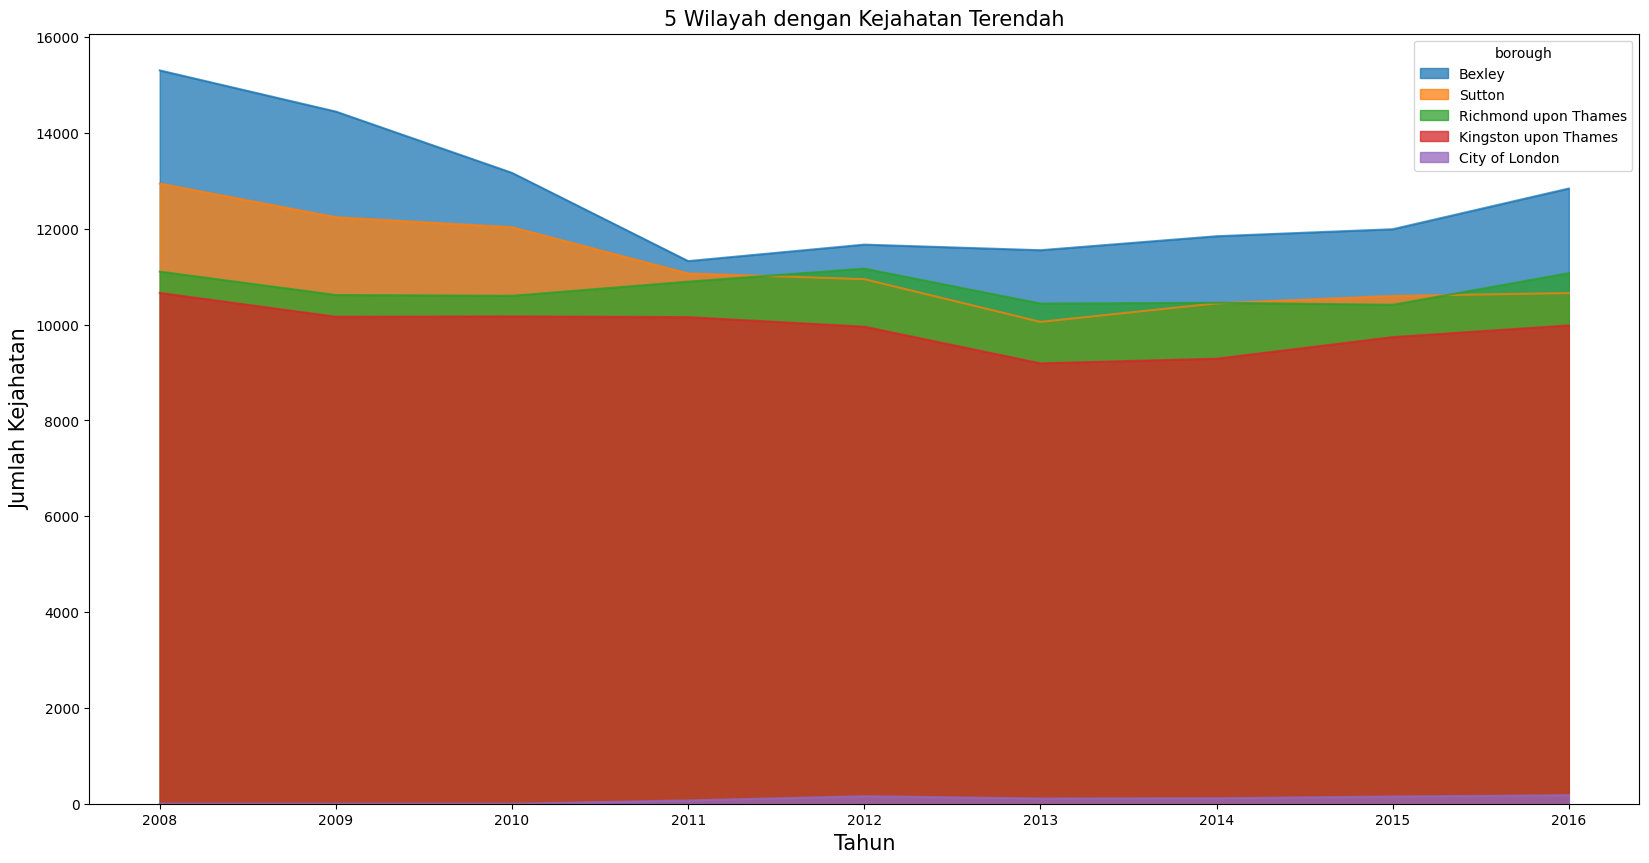

In [79]:
lowest5_borough.plot(kind='area',
                alpha=0.75,
                stacked=False,
                figsize=(20,10), 
                )

plt.title('5 Wilayah dengan Kejahatan Terendah', fontsize=15)
plt.ylabel('Jumlah Kejahatan', fontsize=15)
plt.xlabel('Tahun', fontsize=15)

plt.show()

Dari visualisasi diatas dapat disimpulkan ada 5 wilayah yang memiliki kasus kejahatan terendah yaitu Bexley, Sutton, Richmond upon Thames, Kingston upon Thames dan , City of London.Wilayah City of London ini memilliki kasus kejahatan yang paling rendah dari wilayah yang lain dengan perbedaan yang sangat besar.Pada tahun 2008-2010 di wilayah City of London ini tidak ada kasus kejahatan sama sekali.

## Histogram
### Distribusi frekuensi jumlah kasus kejahatan dari kategori major pada tahun 2016

Menampilkan jenis dan jumlah kasus kejahatan pada tahun 2016

In [80]:
major_crime['2016'].head()

major_category
Theft and Handling             294133
Violence Against the Person    232381
Burglary                        68285
Criminal Damage                 64071
Drugs                           38914
Name: 2016, dtype: int64

In [81]:
count, bin_edges = np.histogram(major_crime['2016'])

print(count)

print(bin_edges) 

[4 1 2 0 0 0 0 1 0 1]
[     0.   29413.3  58826.6  88239.9 117653.2 147066.5 176479.8 205893.1
 235306.4 264719.7 294133. ]


Membuat plot atau grafik distribusi ini dengan histogram.

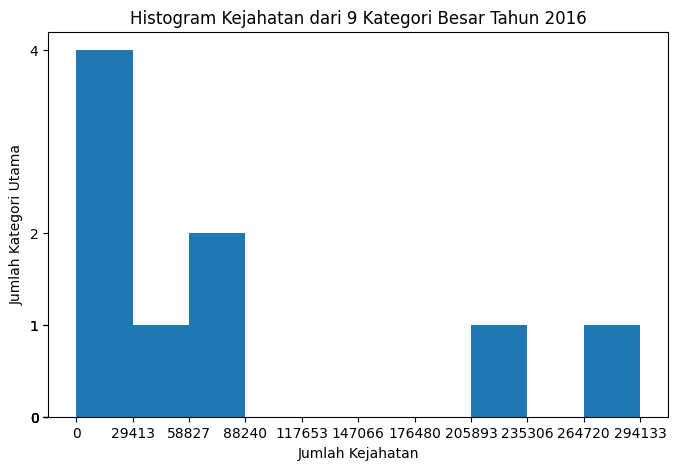

In [82]:
count, bin_edges = np.histogram(major_crime['2016'])

major_crime['2016'].plot(kind='hist', figsize=(8,5), xticks=bin_edges, yticks=count)

plt.title('Histogram Kejahatan dari 9 Kategori Besar Tahun 2016')
plt.ylabel('Jumlah Kategori Utama')
plt.xlabel('Jumlah Kejahatan')

plt.show()

Dari grafik diatas dengan memecah dataset menjadi 10 bin .Dapat disimpulkan distribusi frekuensi kasus kejahatan di tahun 2016 yaitu: 

- 3 kategori major menyumbang antara 0 hingga 33.405 kasus kejahatan
- 3 kategori major menyumbang antara 33.405 hingga 66.811 kasus kejahatan
- 1 kategori major menyumbang antara 66.811 hingga 100.216 kasus kejahatan
- 1 kategori major menyumbang antara 133.622 hingga 167.027 kasus kejahatan
- 1 kategori major menyumbang antara 300.649 hingga 334.054 kasus kejahatan

### Distribusi kasus kejahatan di wilayah Greenwich, Redbridge, dan Brent pada tahun 2008 - 2016

Menampilkan total kasus kejahatan pada wilayah Greenwich, Redbridge, dan Brent

In [83]:
crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun]

,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Greenwich,22010,19851,18626,18552,20028,18948,19894,20929,22730
Redbridge,20873,20837,20652,21994,21424,19793,19590,18897,19502
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693


Membuat variabel df_grb dan melakukan transpose dari data set sebelumnya

In [84]:
df_grb = crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun].T
df_grb

borough,Greenwich,Redbridge,Brent
2008,22010,20873,23504
2009,19851,20837,24748
2010,18626,20652,25512
2011,18552,21994,27669
2012,20028,21424,26357
2013,18948,19793,23759
2014,19894,19590,24426
2015,20929,18897,24883
2016,22730,19502,26693


Meningkatkan ukuran bin menjadi 15 dengan meneruskan parameter bins

In [85]:
count, bin_edges = np.histogram(df_grb, 15)
print(count)
print(bin_edges)

[4 2 4 4 1 2 1 0 2 1 2 1 1 1 1]
[18552.  19159.8 19767.6 20375.4 20983.2 21591.  22198.8 22806.6 23414.4
 24022.2 24630.  25237.8 25845.6 26453.4 27061.2 27669. ]


- Mengatur transparansi menjadi 60% dengan meneruskan parameter alfa
- Memberi label sumbu x dengan melewatkan parameter label-x
- Mengubah warna plot dengan memasukkan parameter warna
- Menggunakan parameter stacked agar plot tidak saling tumpang tindih

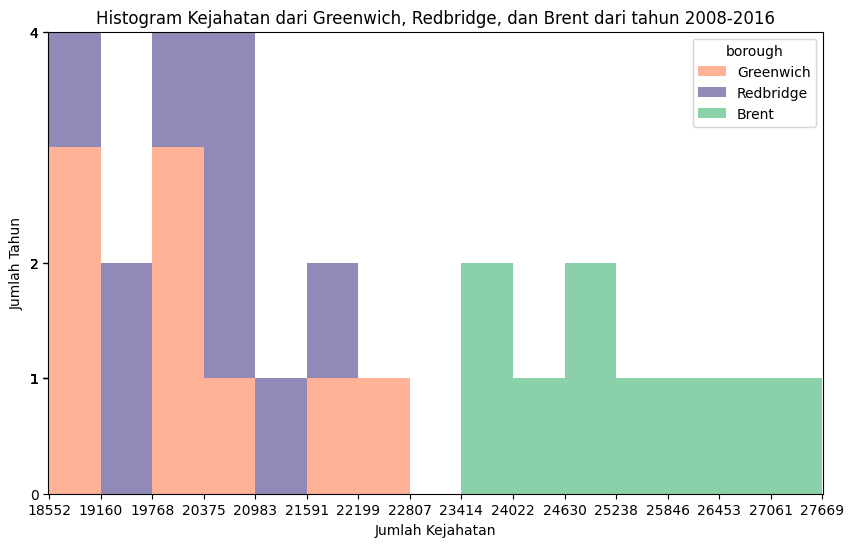

In [137]:
count, bin_edges = np.histogram(df_grb, 15)
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10  

df_grb.plot(kind='hist',
          figsize=(10,6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          yticks=count,  
          stacked=True,
          xlim=(xmin,xmax),  
          color=['coral', 'darkslateblue', 'mediumseagreen']
          )

plt.title('Histogram Kejahatan dari Greenwich, Redbridge, dan Brent dari tahun 2008-2016')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Jumlah Tahun')

plt.show()

## BarChart
### Membandingkan jumlah kasus kriminal pada kategori Drugs pada tahun 2008 - 2016

Membuat variabel df_drugs dan menampilkan data yang dibutuhkan

In [87]:
df_drugs = major_crime.loc['Drugs', years]
df_drugs

2008    68804
2009    60549
2010    58674
2011    57550
2012    51776
2013    50278
2014    44435
2015    39785
2016    38914
Name: Drugs, dtype: int64

Membuat visualisasi plot data menggunakan bar

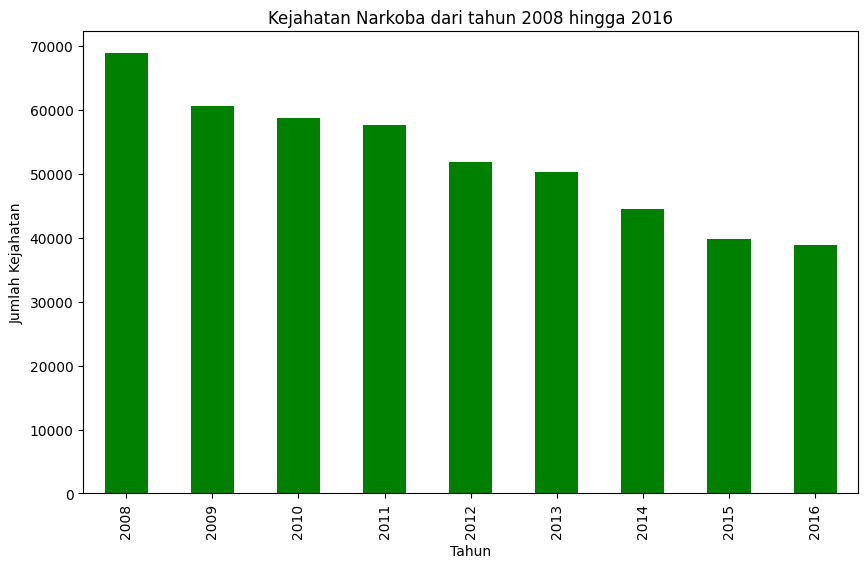

In [136]:
df_drugs.plot(kind='bar', figsize=(10,6), color='green')

plt.title('Kejahatan Narkoba dari tahun 2008 hingga 2016')
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')

plt.show()

Dari grafik atau visualisasi diatas dapat disimpulkan bahwa kasus kejahatan narkoba tertinggi terjadi di tahun 2008 dengan total kasus 68.804 dan kejahatan narkoba terendah ada pada tahun 2016 dengan total kasus 38.914. Kejahatan narkoba diatas dapat di simpulkan menurun pada setiap tahunnya.

### Membandingkan jumlah kasus kriminal di London pada tahun 2008 - 2016

Membuat variabel df_london dan mengambil data yang diperlukan

In [115]:
df_london = crime_borough['Total Crime in Borough']
df_london.head()

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: Total Crime in Borough, dtype: int64

Membuat plot dari df_london

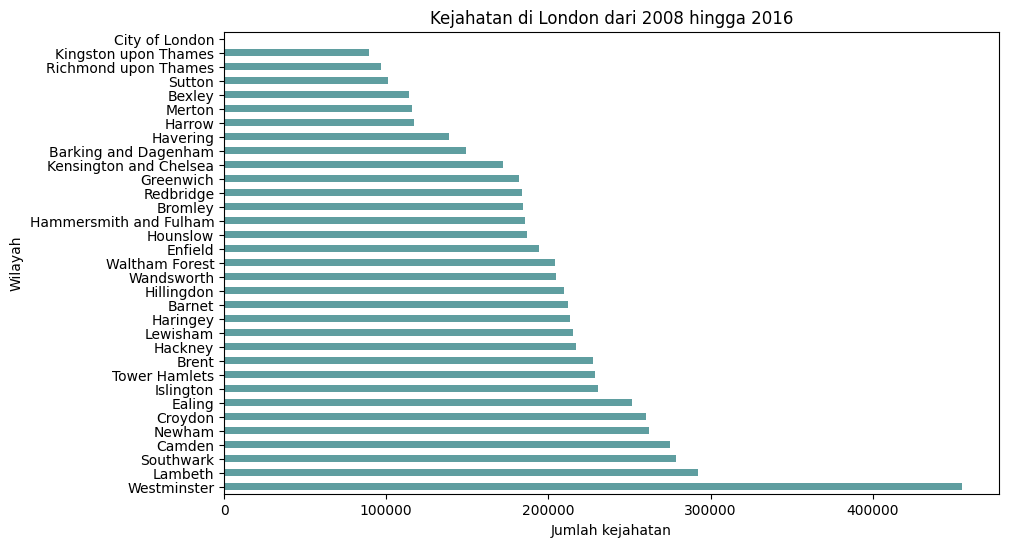

In [117]:
df_london.plot(kind='barh', figsize=(10,6), color='cadetblue')

plt.title('Kejahatan di London dari 2008 hingga 2016')
plt.ylabel('Wilayah')
plt.xlabel('Jumlah kejahatan')

plt.show()

Dapat disimpulkan dari barchart diatas kasus kejahatan di london dari yang paling terendah hingga tertinggi secara horizontal. Kasus kejahatan tertinggi berada di wilayah Wesminster dan kasus kejahatan terendah berada di wilayah City of London

## Pie Chart
### 5 Kasus kriminal tertinggi berdasarkan major kategori pada tahun 2008

Membuat variabel top5 dan mengambil data yang diperlukan

In [127]:
top5 = major_crime['2008'].head(5)
top5

major_category
Theft and Handling             283692
Violence Against the Person    159844
Burglary                        88092
Criminal Damage                 91872
Drugs                           68804
Name: 2008, dtype: int64

Membuat plot data menggunakan pie chart

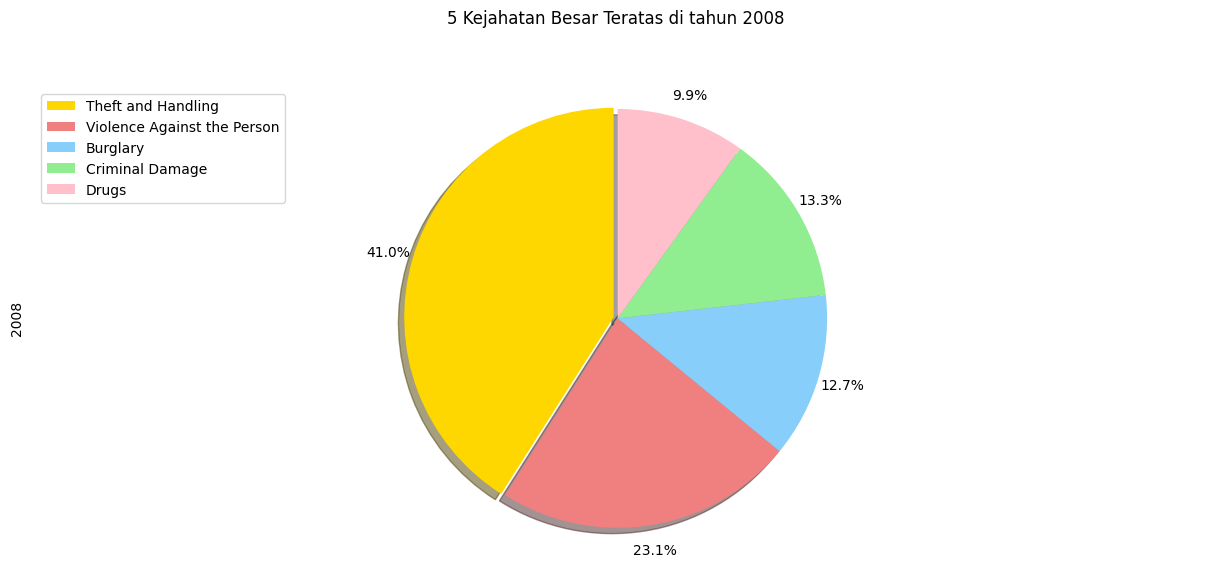

In [128]:
colors_list = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# jarak antar data pada pie chart
explode_list = [.02, 0, 0, 0, 0] 

top5.plot(kind='pie',
          figsize=(15, 6),
          autopct='%1.1f%%', 
          startangle=90,    
          shadow=True,       
          labels=None,         
          pctdistance=1.12,    
          colors=colors_list,  
          explode=explode_list 
         )

plt.title('5 Kejahatan Besar Teratas di tahun 2008', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=top5.index, loc='upper left') 

plt.show()

Berdasarkan visualisasi atau pie chart diatas ada 5 kasus kejahatan tertinggi berdasarkan kategori major pada tahun 2008 sebagai berikut :

- Theft and Handling dengan persentase 41.0%
- Violence Against the Person dengan persentase 23.1%
- Criminal Damage dengan persentase 13.3%
- Burglary dengan persentase 12.7%
- Drugs dengan persentase 9.9%

## 7 wilayah dengan jumlah kasus kriminal tertinggi pada tahun 2008-2016

Membuat variabel top7 dan mengambil data yang diperlukan

In [129]:
top7 = crime_borough['Total Crime in Borough'].head(7)
top7

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Croydon        260294
Ealing         251562
Name: Total Crime in Borough, dtype: int64

Membuat plot data menggunakan pie chart

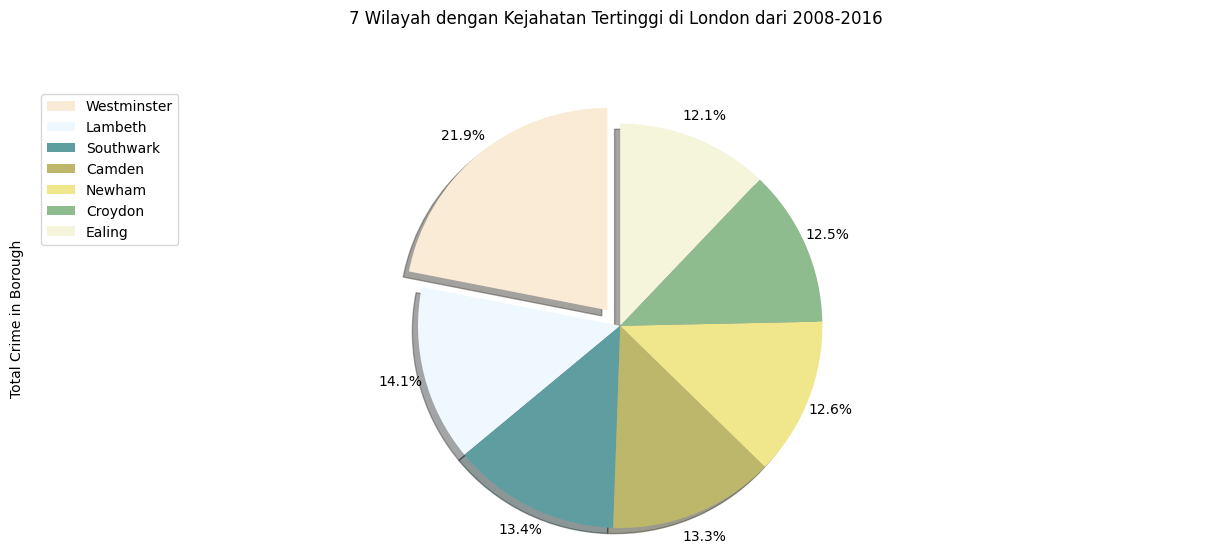

In [132]:
colors_list = ['antiquewhite', 'aliceblue', 'cadetblue', 'darkkhaki', 'khaki', 'darkseagreen', 'beige']
explode_list = [0.1, 0, 0, 0, 0, 0, 0]

top7.plot(kind='pie',
          figsize=(15, 6),
          autopct='%1.1f%%', 
          startangle=90,    
          shadow=True,       
          labels=None,         
          pctdistance=1.12,    
          colors=colors_list,  
          explode=explode_list 
         )

plt.title('7 Wilayah dengan Kejahatan Tertinggi di London dari 2008-2016', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=top7.index, loc='upper left') 

plt.show()

Berdasarkan visualisasi atau pie chart diatas ada 7 wilayah di london dengan jumlah kasus kejahatan dari tertinggi ke terendah sebagai berikut :

- Westminster dengan persentase 21.9%
- Lambeth dengan persentase 14.1%
- Southwark dengan persentase 13.4%
- Camden dengan persentase 13.3%
- Newham dengan persentase 12.6%
- Croydon dengan persentase 12.5%
- Ealing dengan persentase 12.1%

### BoxPlot 

Membuat variabel 'df_burglary' dan mengambil data yang diperlukan

In [95]:
df_burglary = major_crime.loc[['Burglary'], years].T
df_burglary.head()

major_category,Burglary
2008,88092
2009,90619
2010,86826
2011,93315
2012,93392


Membuat plot atau visualisasi dengan jenis box

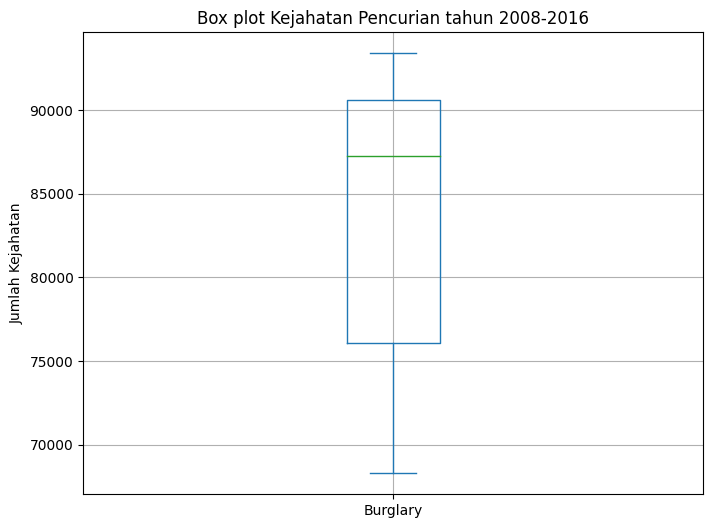

In [133]:
df_burglary.plot(kind='box', figsize=(8, 6), grid=True)

plt.title('Box plot Kejahatan Pencurian tahun 2008-2016')
plt.ylabel('Jumlah Kejahatan')

plt.show()

Dari visualisasi diatas menggunakan box plot dapat di simpulkan dari kasus burglary yaitu  
- jumlah minimum kasus sekitar 70.000(Min). 
- jumlah maksimum kasus sekitar 90.000 (max). 
- jumlah rata-rata kasus sekitar 87.000 (median)
- 25%  untuk periode 2008-2016 memiliki jumlah kasus tahunan ~76.000 atau kurang (Kuartil pertama).
- 75%  untuk periode 2008-2016 memiliki jumlah kasus tahunan ~90.500 atau kurang (kuartil ketiga).

Bisa melihat agar lebih detail dengan memanggil metode describe()

In [97]:
df_burglary.describe()

major_category,Burglary
count,9.000000
mean,83810.333333
std,9658.166674
min,68285.000000
25%,76053.000000
50%,87222.000000
75%,90619.000000
max,93392.000000


###  Perbandingan distribusi jumlah kasus dari wilayah Camden dan Ealing pada tahun 2008-2016

Membuat variabel 'df_ce' dan mengambil data yang diperlukan

In [98]:
df_ce = crime_borough.loc[(['Camden', 'Ealing'], tahun)].T
df_ce.head()

borough,Camden,Ealing
2008,32010,28947
2009,31612,28617
2010,31804,31360
2011,33956,29537
2012,31472,28832


Menampilkan persentase perbandingan antara 2 wilayah dengan metode describe()

In [99]:
df_ce.describe()

borough,Camden,Ealing
count,9.000000,9.000000
mean,30571.888889,27951.333333
std,2121.547633,2028.142192
min,27198.000000,24978.000000
25%,29183.000000,26247.000000
50%,31472.000000,28617.000000
75%,31804.000000,28947.000000
max,33956.000000,31360.000000


Membuat box plot dari df_ce

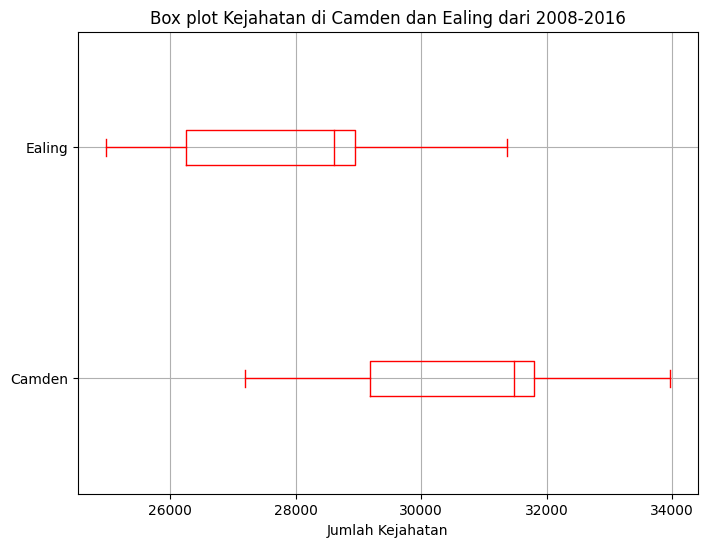

In [135]:
df_ce.plot(kind='box', figsize=(8, 6), grid=True, color='red', vert=False)

plt.title('Box plot Kejahatan di Camden dan Ealing dari 2008-2016')
plt.xlabel('Jumlah Kejahatan')

plt.show()

Dari visualisasi diatas menggunakan box plot dapat di simpulkan wilayah Camden memiliki kasus kejahatan lebih banyak dibandingkan dengan wilayah Ealing.Kasus maksimum dari wilayah Ealing (31.360) hampir sama dengan median dari kasus wilayah Camden (31.472)

## ScatterPlot

### Persebaran kasus kriminal dari Greenwich, Redbridge, dan Brent pada tahun 2008 - 2016

Membuat variabel df_total dan mengambil data yang diperlukan

In [101]:
df_grb = crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun].T

df_total = pd.DataFrame(df_grb.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total

,year,total
0,2008,66387
1,2009,65436
2,2010,64790
3,2011,68215
4,2012,67809
5,2013,62500
6,2014,63910
7,2015,64709
8,2016,68925


Membuat plot data dengan jenis scatter

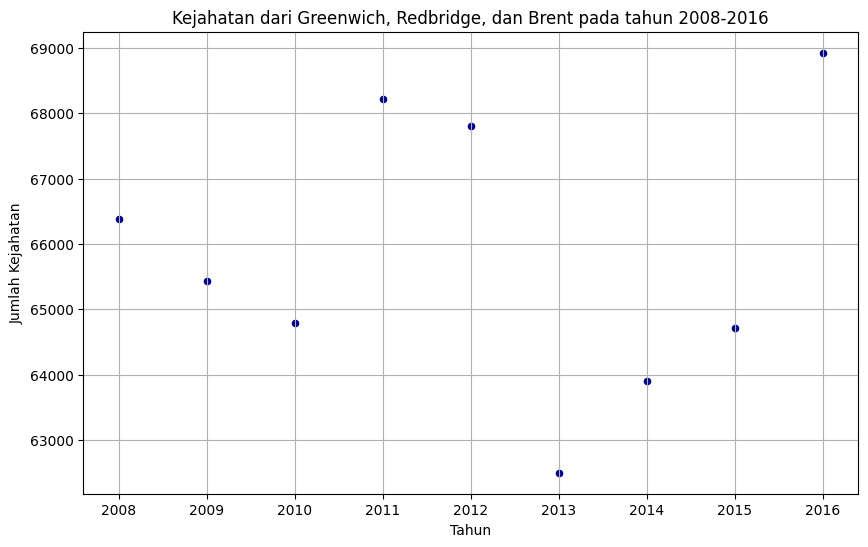

In [102]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue', grid=True)
plt.title('Kejahatan dari Greenwich, Redbridge, dan Brent pada tahun 2008-2016')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.show()

Berdasarkan visualisasi diatas pada tahun 2016 merupakan tahun dimana terjadinya kasus kejahatan tertinggi di 3 wilayah yaitu Greenwich, Redbridge, dan Brent.Kasus kejahatan terendah di Greenwich, Redbridge, dan Brent yaitu pada tahun 2013 

## WORD CLOUDS 

Mengguunakan set uuntuk menghapus stopword yang berllebihan

In [103]:
stopwords = set(STOPWORDS)

Membuat variabel minor_crime

In [104]:
minor_crime = ''.join(df.minor_category)

Inisialisasi objek wordcloud dan generate wordcloud

In [105]:
crime_wc = WordCloud(background_color='aliceblue',
                     max_words=100, 
                     stopwords=stopwords
                    )

crime_wc.generate(minor_crime)

Menampilkan wordcloud yang sudah dibuat

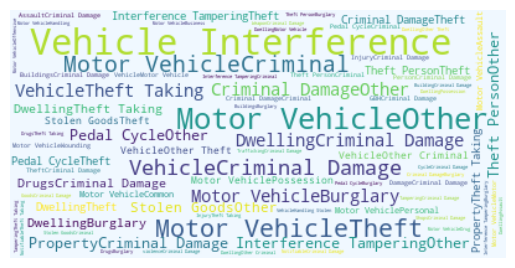

In [106]:
plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Dari Wordcloud diatas dapat disimpulkan bahwa tulisan yang paling besar yaitu kategori kejahatan yang paling banyak atau tertinggi di london yaitu Motor Vehicle Other, Motor Vehicle Thef dan Vehicle Interference

### Memvisualisaikan words ke dalam sebuah gambar

In [107]:
anjing = np.array(Image.open('D:/Kuliah/Semester 7/Hacktiv8/Jupyter/Assigment python 1/anjing.jpg'))

Mengecek masking atau gambar

In [108]:
anjing

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Menampilkan gambar masking yang di gunakan

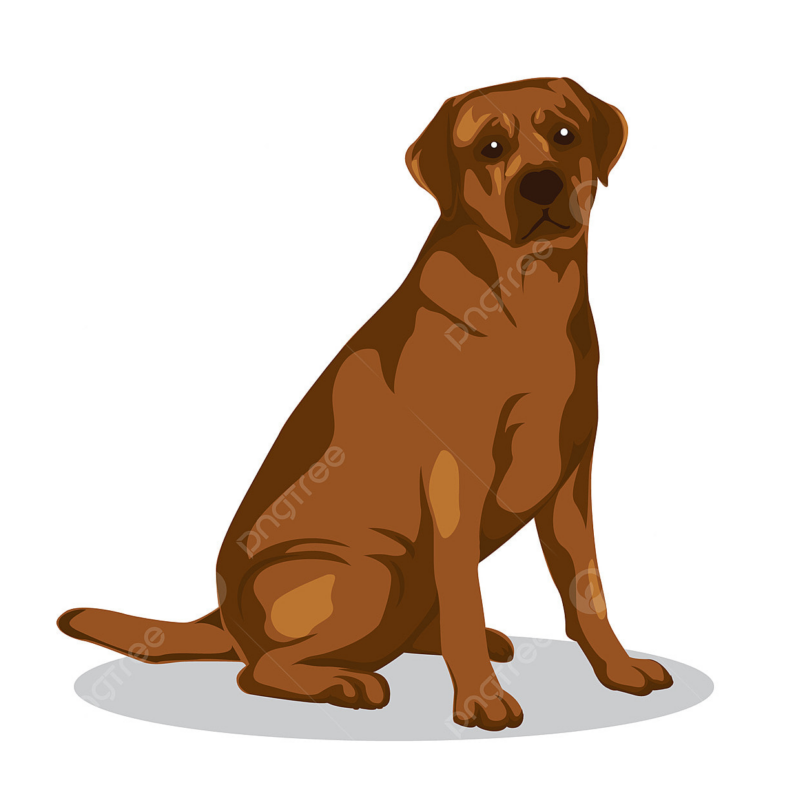

In [109]:
fig=plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(anjing,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk wordcloud sesuai masking

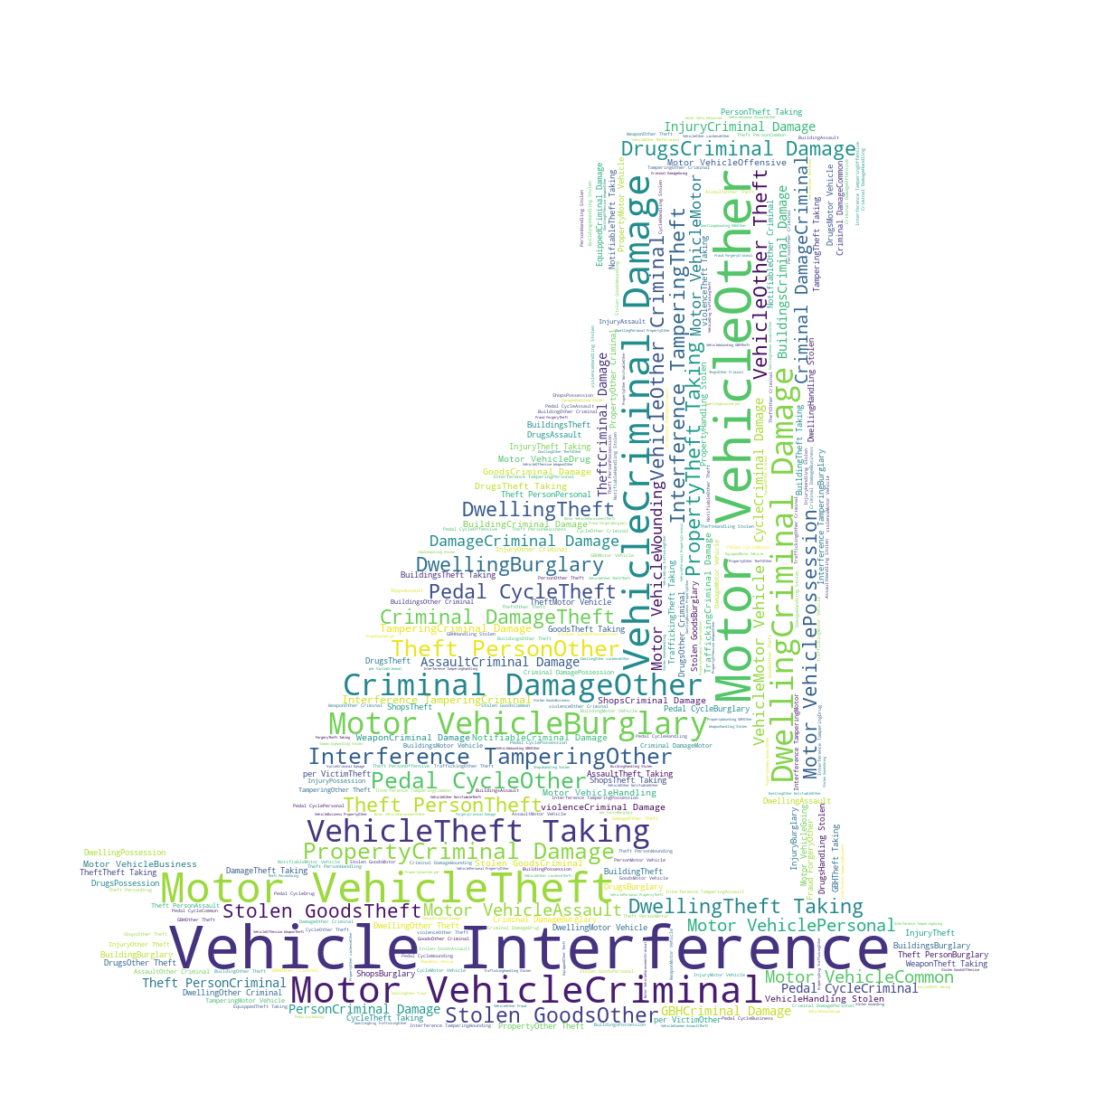

In [110]:
crime_wc = WordCloud(background_color='white', max_words=300,
                    mask=anjing, stopwords=stopwords)

crime_wc.generate(minor_crime)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(crime_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

Dari Wordcloud diatas dapat disimpulkan bahwa tulisan yang paling besar yaitu kategori kejahatan yang paling banyak atau tertinggi di london yaitu Motor Vehicle Other, Motor Vehicle Thef dan Vehicle Interference

## Folium Maps
### Visualisasi peta London menggunakan Folium

Mengatur latitude(lintang) dan longitude(bujur) dari negara London

In [111]:
lat = 51.509865
long = -0.118092

Membuat variabel london_map dan menampilkannya

In [112]:
london_map = folium.Map(location=[lat, long], zoom_start=12)

london_map

Visualisasi peta London dengan Stamen Toner Maps

In [113]:


london_map = folium.Map(location=[lat, long], zoom_start=12, tiles='Stamen Toner')

london_map

Visualisasi peta London dengan Stamen Terrain Maps

In [116]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12, tiles='Stamen Terrain')

london_map